<a href="https://colab.research.google.com/github/dhanavel2021/Duplicates-outlier/blob/main/Missing_values_and_Duplicate_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
ds=pd.read_csv('/black_friday_train.csv')

In [ ]:
ds

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550115,1001636,P00251542,F,26-35,19,C,0,0,11,16.0,NaN,1716
550116,1001636,P00102342,F,26-35,19,C,0,0,8,14.0,17.0,6125
550117,1001636,P00310042,F,26-35,19,C,0,0,5,8.0,NaN,1890
550118,1001636,P00296042,F,26-35,19,C,0,0,8,13.0,16.0,9896


In [ ]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550120 entries, 0 to 550119
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550120 non-null  int64  
 1   Product_ID                  550120 non-null  object 
 2   Gender                      550120 non-null  object 
 3   Age                         550120 non-null  object 
 4   Occupation                  550120 non-null  int64  
 5   City_Category               550120 non-null  object 
 6   Stay_In_Current_City_Years  550120 non-null  object 
 7   Marital_Status              550120 non-null  int64  
 8   Product_Category_1          550120 non-null  int64  
 9   Product_Category_2          376463 non-null  float64
 10  Product_Category_3          166835 non-null  float64
 11  Purchase                    550120 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
ds.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
ds.shape

(550120, 12)

In [ ]:
ds.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.501200e+05,550120.000000,550120.000000,550120.000000,376463.000000,166835.000000,550120.000000
mean,1.003029e+06,8.076243,0.409616,5.404252,9.842189,12.668043,9263.922980
std,1.727563e+03,6.522877,0.491763,3.936260,5.086613,4.125426,5023.073588
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
ds.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550115     True
550116     True
550117     True
550118     True
550119     True
Length: 550120, dtype: bool

In [ ]:
s=ds.drop_duplicates(['User_ID'])

In [ ]:
s.shape

(5891, 12)

In [ ]:
s.duplicated()

0         False
4         False
5         False
6         False
9         False
          ...  
185450    False
187076    False
221494    False
229480    False
243533    False
Length: 5891, dtype: bool

In [ ]:

q1=s.Purchase.quantile(.25)
q2=s.Purchase.quantile(.50)
q3=s.Purchase.quantile(.75)
print(q1,"\n",q2,"\n",q3)

6125.0 
 8671.0 
 14374.0


In [ ]:
iqr=q3-q1

In [ ]:
lc=q1-1.5*iqr
uc=q3+1.5*iqr
print(lc)
print(uc)

-6248.5
26747.5


In [ ]:
p0=s.Purchase.min()
p100=s.Purchase.max()


In [ ]:
print("p0=",p0,
      "p100=",p100,
      "lc=",lc,
      "uc=",uc)

p0= 189 p100= 23958 lc= -6248.5 uc= 26747.5


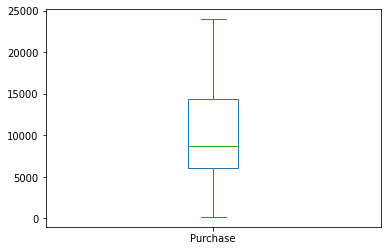

In [ ]:
s.Purchase.plot(kind="box")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


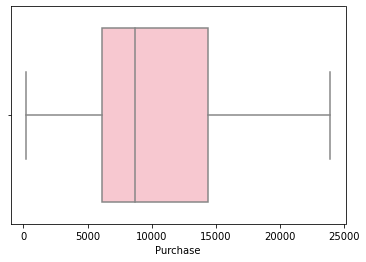

In [ ]:
sns.boxplot(s['Purchase'],color='pink')

{'boxes': [<matplotlib.lines.Line2D at 0x7f4eecf64410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4eeceea4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4eeceef510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4eeceeaf90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4eecf64a10>,
  <matplotlib.lines.Line2D at 0x7f4eecf64f50>]}

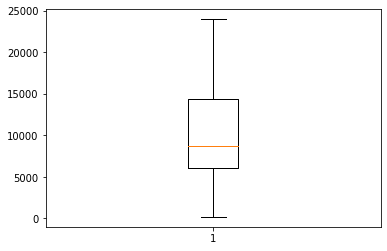

In [ ]:
plt.boxplot(s['Purchase'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f4eeceb4b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4eecebe710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4eecece810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4eececec10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4eecebea10>,
  <matplotlib.lines.Line2D at 0x7f4eecebe8d0>]}

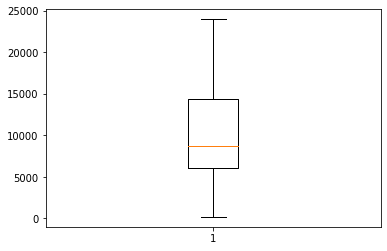

In [ ]:
s.Purchase.clip(upper=uc)
plt.boxplot(s['Purchase'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


{'boxes': [<matplotlib.lines.Line2D at 0x7f4eece526d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4eece56790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4eece5d7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4eece5d290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4eece52cd0>,
  <matplotlib.lines.Line2D at 0x7f4eece56250>]}

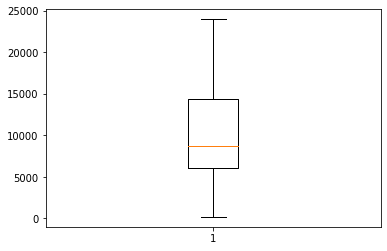

In [ ]:
s.Purchase.clip(upper=uc,inplace=True)
plt.boxplot(s['Purchase'])

In [ ]:
s.shape

(5891, 12)

In [ ]:
s.isna().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1794
Product_Category_3            3977
Purchase                         0
dtype: int64

In [ ]:
s.isna().sum().sort_values(ascending=True)

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Purchase                         0
Product_Category_2            1794
Product_Category_3            3977
dtype: int64

In [ ]:
s.isna().sum().sort_values(ascending=False)

Product_Category_3            3977
Product_Category_2            1794
User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Purchase                         0
dtype: int64

In [ ]:
s.isna().sum()/s.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.304532
Product_Category_3            0.675098
Purchase                      0.000000
dtype: float64

missing value treatment: 



Drop variable
drop observations
missing value imputation

In [ ]:
s.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.891000e+03,5891.000000,5891.000000,5891.000000,5891.000000,1914.000000,5891.000000
mean,1.003025e+06,8.153285,0.419963,5.298931,9.297912,12.572623,9991.237651
std,1.743379e+03,6.323140,0.493594,3.726667,4.362328,4.177354,5224.146862
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,189.000000
25%,1.001518e+06,3.000000,0.000000,1.000000,8.000000,9.000000,6125.000000
50%,1.003026e+06,7.000000,0.000000,5.000000,8.000000,14.000000,8671.000000
75%,1.004532e+06,14.000000,1.000000,8.000000,14.000000,16.000000,14374.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [ ]:
s.Product_Category_2.mode()[0]

8.0

In [ ]:
s.Product_Category_2.fillna(s.Product_Category_2.mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
s.dropna(axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<function matplotlib.pyplot.show>

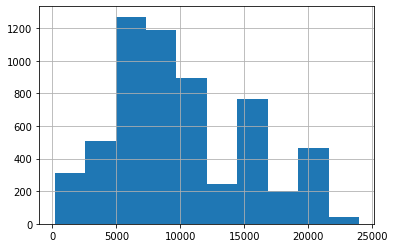

In [ ]:
s.Purchase.hist()
plt.show

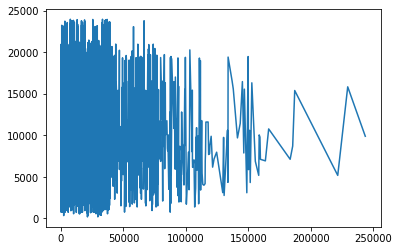

In [ ]:
s.Purchase.plot()

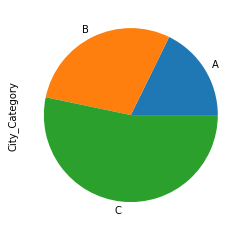

In [ ]:
s.groupby('City_Category').City_Category.count().plot(kind='pie')

In [ ]:
s.select_dtypes(['float64','int64']).corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.019323,0.002596,0.000589,0.000680,0.021870
Occupation,-0.019323,1.000000,0.032028,-0.015519,0.000763,0.026769
Marital_Status,0.002596,0.032028,1.000000,0.026162,0.035952,-0.014296
Product_Category_1,0.000589,-0.015519,0.026162,1.000000,0.326697,-0.313956
Product_Category_2,0.000680,0.000763,0.035952,0.326697,1.000000,-0.173168
Purchase,0.021870,0.026769,-0.014296,-0.313956,-0.173168,1.000000


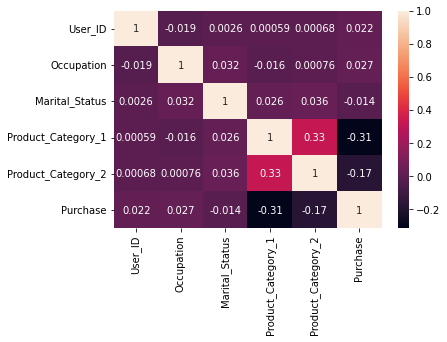

In [ ]:
sns.heatmap(s.select_dtypes(['float64','int64']).corr(),annot=True)

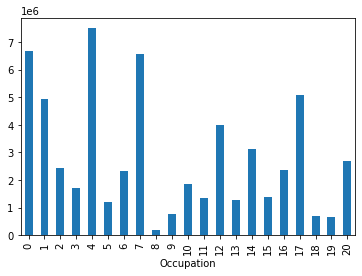

In [ ]:
s.groupby('Occupation').Purchase.sum().plot(kind='bar')

In [ ]:
s.groupby('Occupation').Purchase.sum()

Occupation
0     6666426
1     4951702
2     2446545
3     1724651
4     7521034
5     1206226
6     2326680
7     6579236
8      192457
9      759757
10    1872176
11    1336328
12    3995353
13    1288652
14    3117136
15    1384428
16    2353063
17    5101703
18     692051
19     643524
20    2699253
Name: Purchase, dtype: int64

<BarContainer object of 21 artists>

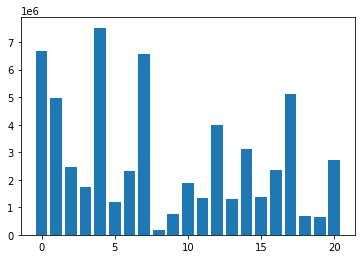

In [ ]:
summary=s.groupby('Occupation').Purchase.sum()
plt.bar(x=summary.index,height=summary.values)